 Load the Data Set (https://bit.ly/3WiUJ7W)

In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
my_data = load_iris()
my_data2 = load_iris()
my_data3 = load_iris()
# my_data.shape
my_data = pd.DataFrame(my_data.data,columns=[my_data.feature_names])
my_data2 = pd.DataFrame(my_data2.data,columns=[my_data2.feature_names])
my_data3 = pd.DataFrame(my_data3.data,columns=[my_data3.feature_names])

my_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


• Plot the first 3 columns of the Data Set and the target column in a
3d scatter plot.
HINT: Use the target column as a hue for the points.
LINK: (https://bit.ly/3SRIsEJ)

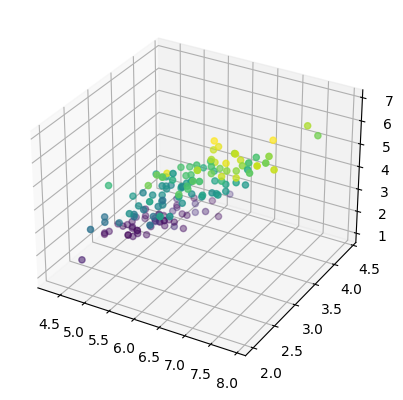

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig2 = fig.add_subplot(projection='3d')
fig2.scatter(my_data['sepal length (cm)'],my_data['sepal width (cm)'],my_data['petal length (cm)'],c=my_data['petal width (cm)'])
plt.show()

Copy the implementation of the Principal Component Analysis algorithm from SMLH

In [4]:
import numpy as np
# Let’s import the PCA algorithm from sklearn and reduce it to 2 dimensions
from sklearn.decomposition import PCA
X = pd.read_csv('heart.csv')
pca = PCA(n_components=2)
pca.fit(X)
# now, let’s transform the data; pca_x represents the new reduced data
pca_X = pca.transform(X)
pca_X

array([[ 80.71978075, -27.10185893],
       [-28.73853123, -12.31015476],
       [ 69.87075596,  41.08296984],
       ...,
       [-80.81643852,  19.27515405],
       [ 27.70286526, -31.38524752],
       [-32.99425296, -35.43276548]])

Create an instance of the Scratch-made PCA algorithm using the
eigenvector algorithm.

In [13]:
# First let standardize the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
iris = load_iris()
my_data = scale.fit_transform(my_data)
my_data[0:5]
# Now compute the covarriance matrix
my_data_cov = np.cov(my_data.T)
my_data_cov
# Create the eigenvalues and eigenvectors
eig_vals, eig_vecs  = np.linalg.eig(my_data_cov)
# Descending order of eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda my_data: my_data[0],reverse=True)
for i in eig_pairs:
     print(i[0])
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print ("Variance captured by each component is \n",var_exp)
print(40 * '-')
print ("Cumulative variance captured as we travel each component \n",cum_var_exp)
print("All Eigen Values along with Eigen Vectors")
print(eig_pairs)
print(40 * '-')
out = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

new_matrix1 = my_data.dot(out)
print(new_matrix1)

2.9380850501999918
0.9201649041624865
0.14774182104494768
0.02085386217646253
Variance captured by each component is 
 [72.96244541329987, 22.85076178670177, 3.668921889282871, 0.5178709107154866]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 72.96244541  95.8132072   99.48212909 100.        ]
All Eigen Values along with Eigen Vectors
[(2.9380850501999918, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (0.9201649041624865, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])), (0.14774182104494768, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])), (0.02085386217646253, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]
----------------------------------------
[[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]
 [-2.07563095 -1.48917752]
 [-2.44402884 -0.0476442 ]
 [-2.23284716 -0.22314807]
 [-2.33464048  

 Create an instance of the Scratch-made PCA algorithm using the
SVD algorithm.

In [14]:
from numpy.linalg import eigh, norm
# my_data2.T@my_data2
eigenvalue, eigenvector = eigh(my_data2.T@my_data2)
# print('Eigenvalue = ',eigenvalue)
# print(eigenvector)
u0 = my_data2@eigenvector[:,0]/norm(my_data2@eigenvector[:,0])
u1 = my_data2@eigenvector[:,1]/norm(my_data2@eigenvector[:,1])
u2 = my_data2@eigenvector[:,2]/norm(my_data2@eigenvector[:,2])
u3 = my_data2@eigenvector[:,3]/norm(my_data2@eigenvector[:,3])
U = np.array([u0,u1,u2,u3]).T
# Now we have to compute the diagonal matrix
D = np.round(U.T@my_data2@eigenvector, decimals=7)
A = U@D@eigenvector.T
V = eigenvector[:2, :]
# Apllying SVD we could decompose our intial matrix in 3 matrix
new_matrix2 = np.dot(my_data2,V.T)
new_matrix2

array([[-6.69455331e-01, -9.61138548e-02],
       [-4.82540820e-01, -3.70284301e-01],
       [-6.18717125e-01, -1.17109974e-01],
       [-6.57418059e-01, -2.62257600e-01],
       [-7.51752229e-01,  3.13608377e-03],
       [-1.00954705e+00, -1.61233932e-01],
       [-8.54757802e-01, -4.30187709e-02],
       [-6.79738774e-01, -1.86587030e-01],
       [-5.92732475e-01, -2.79180600e-01],
       [-4.86062966e-01, -3.19425802e-01],
       [-7.02059489e-01, -1.10916461e-01],
       [-7.72319115e-01, -1.77810267e-01],
       [-4.39511429e-01, -3.00550078e-01],
       [-5.14666086e-01,  2.21013059e-02],
       [-6.39127734e-01,  1.28777459e-01],
       [-1.10754515e+00,  1.90559809e-01],
       [-8.95877086e-01,  5.74638688e-02],
       [-7.44566147e-01, -1.34122472e-01],
       [-7.87976482e-01, -2.85926466e-01],
       [-9.23630055e-01,  1.37760737e-02],
       [-6.08248053e-01, -4.22838357e-01],
       [-9.48525398e-01, -9.17568755e-02],
       [-7.66407970e-01,  3.48736311e-01],
       [-8.

Create an instance of sklearn and implement a PCA algorithm.

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(my_data3)
new_matrix3 = pca.transform(my_data3)
new_matrix3 = pd.DataFrame(new_matrix3)
new_matrix3

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


 Create a plot that combines 3 scatter plots and plots each of the
result Data Sets in a separate window. Each window should be related
to which version of the PCA was used.

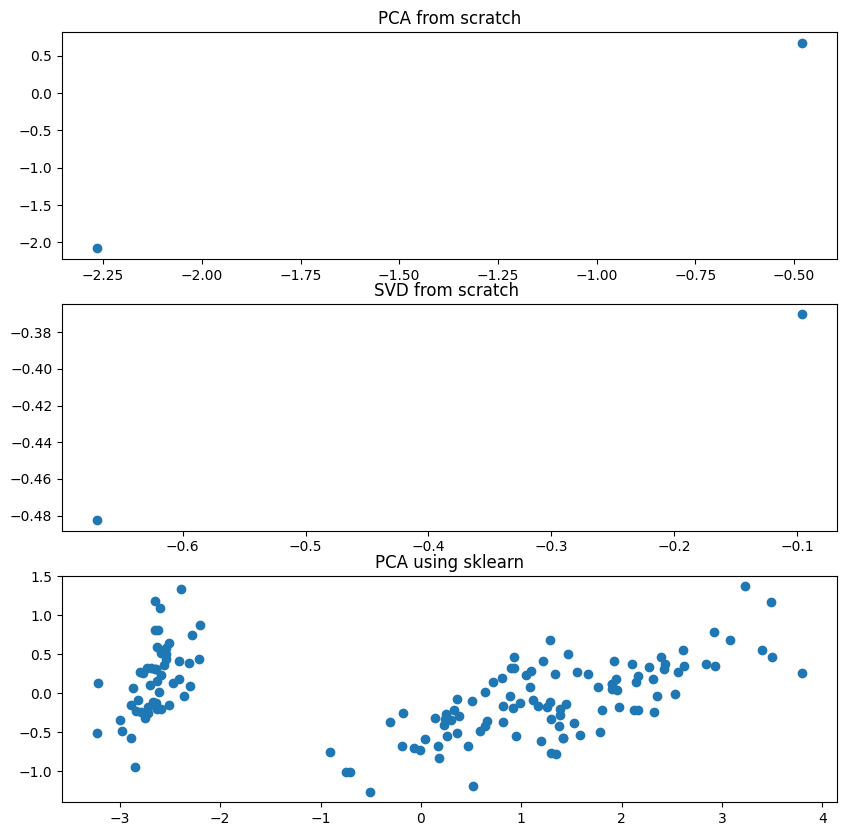

In [16]:
import matplotlib.pyplot as plt
fig, (ax1, ax2,ax3) = plt.subplots(3,figsize=(10,10))
ax1.scatter(new_matrix1[0],new_matrix1[1])
ax1.set_title('PCA from scratch')
ax2.scatter(new_matrix2[0],new_matrix2[1])
ax2.set_title('SVD from scratch ')
ax3.scatter(new_matrix3[0],new_matrix3[1])
ax3.set_title('PCA using sklearn')
plt.show()

Retrain a sklearn PCA model on the iris Data Set with n components
set to 1.

In [19]:
pca = PCA(n_components=1)
pca.fit(my_data3)
new_matrix3 = pca.transform(my_data3)
new_matrix3 = pd.DataFrame(new_matrix3)
pca.explained_variance_ratio_

array([0.92461872])

 Create a line plot of the explained variance ratio

[0.92461872 0.05306648 0.01710261]


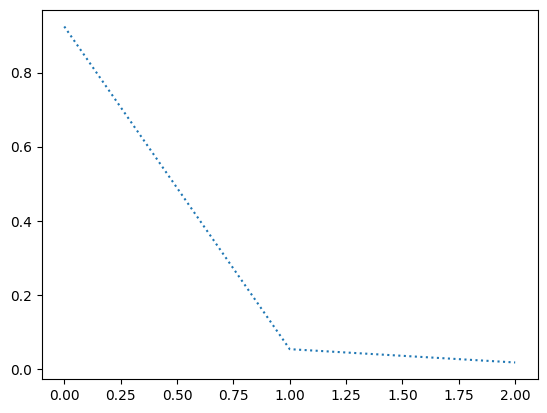

In [20]:
pca = PCA(n_components=3)
pca.fit(my_data3)
new_matrix3 = pca.transform(my_data3)
new_matrix3 = pd.DataFrame(new_matrix3)
img = pca.explained_variance_ratio_
print(img)
plt.plot(img, linestyle = 'dotted')
plt.show()
plt.show()

Create an instance of the sklearn PCA.
• Apply scaling on the digit Data Set.
• Train the PCA on the digit Data Set.
• Reduce the dimensionality of the Data Set to 2 dimensions.

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
df = load_digits()
df = pd.DataFrame(df.data)
new_df = StandardScaler()
new_df = new_df.fit_transform(df)
vin = PCA(n_components=2)
vin.fit(new_df)
final_df = vin.transform(new_df)
final_df = pd.DataFrame(final_df)
final_df

,0,1
0,1.914214,-0.954498
1,0.588980,0.924631
2,1.302038,-0.317204
3,-3.020770,-0.868765
4,4.528949,-1.093474
...,...,...
1792,0.104331,0.255021
1793,2.423235,-1.429612
1794,1.022596,-0.147907
1795,1.076055,-0.380907


Plot the new result Data Set in a scatter plot with each point colored
by its digit label.

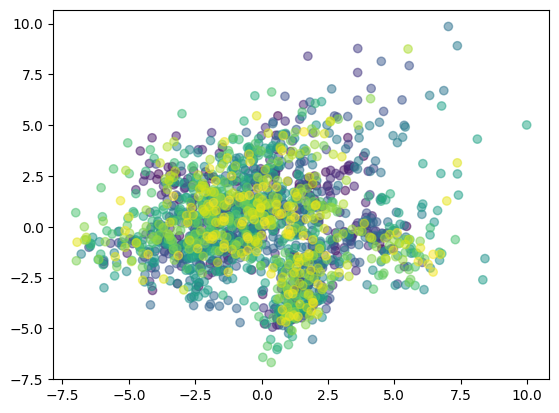

In [35]:
import matplotlib.pyplot as plt
import random
x = final_df[0]
y = final_df[1]
digital_number = [range(1797)]
plt.scatter(x, y, c = digital_number, alpha=0.5)

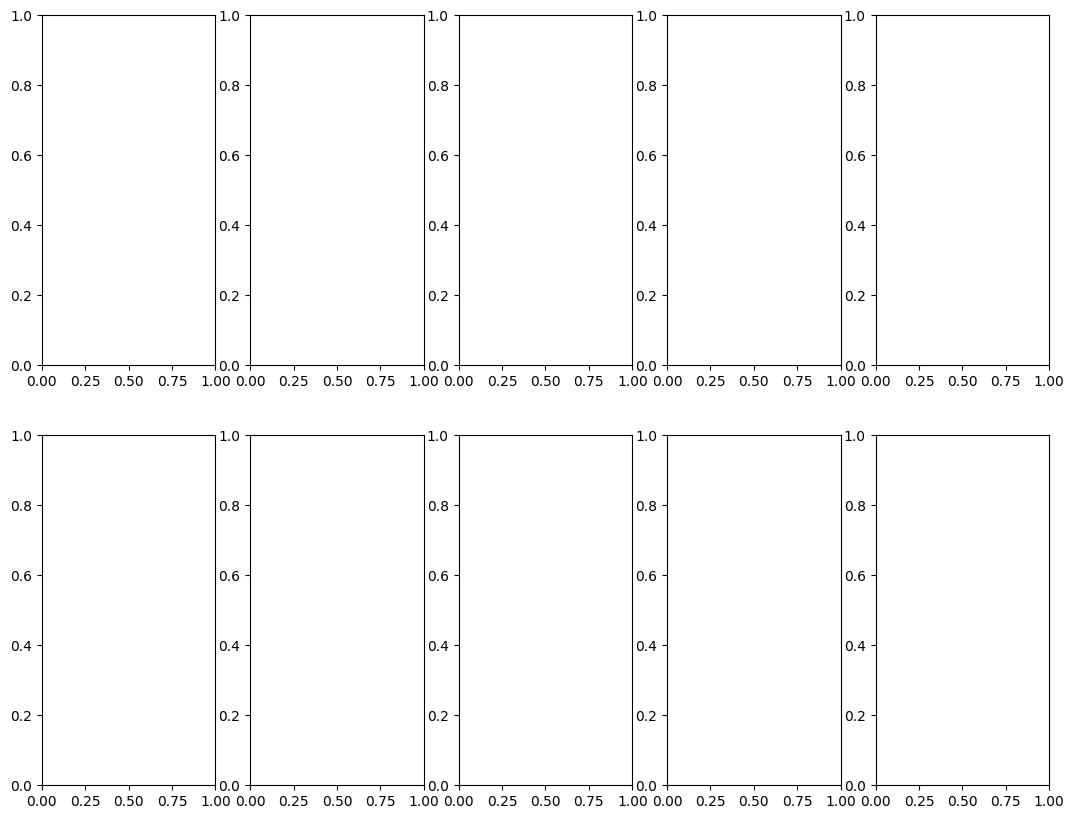

In [36]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(13,10))
plt.show()